# Demonstration of Automatic Data Processing

## Clean data set example

8/25/20

### Notebook setup and library imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# PVInsight Code Imports
from solardatatools import DataHandler
from solardatatools.dataio import get_pvdaq_data

### Load data table from external source

For today's example, we're loading data from NREL's PVDAQ API, which is a publically available PV generatation data set. 

In [3]:
data_frame = get_pvdaq_data(sysid=1199, year=[2015, 2016, 2017], api_key='DEMO_KEY')

In [4]:
data_frame.head()

,SiteID,ac_power,dc_power,inv1_ac_power,inv1_dc_current,inv1_dc_power,inv1_dc_voltage,inv1_temp,inv2_ac_power,inv2_dc_current,...,inv6_ac_power,inv6_dc_current,inv6_dc_power,inv6_dc_voltage,inv6_temp,inv7_ac_power,inv7_dc_current,inv7_dc_power,inv7_dc_voltage,inv7_temp
2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Running the `DataHandler` processing pipeline

In [42]:
data_frame.loc['2017-06-01':] = data_frame.loc['2017-06-01':] * 0.75

In [43]:
dh = DataHandler(data_frame)

In [44]:
dh.run_pipeline(power_col='ac_power')

total time: 2.21 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              0.15s
Cleaning                   0.70s
Filtering/Summarizing      1.36s
    Data quality           0.23s
    Clear day detect       0.17s
    Clipping detect        0.20s
    Capacity change detect 0.76s



### Top-level reporting

First we view a quick summary of the data set. 

In [45]:
dh.report()

Length:                3.00 years
Capacity estimate:     40.45 kW
Data sampling:         5 minute
Data quality score:    95.5%
Data clearness score:  17.8%
Inverter clipping:     False
Time shifts corrected: True
Time zone correction:  -1 hours


We use heat maps to view the entire data set at once. This provides a much clearer picture of system performance and data set quality than trying to view the time series signal over multiple years.

The "raw" matrix is the initial embedding of the data table after infering the correct shape (number of data points per day by the number of full days) and standardizing the time axis. The white spaces are missing data.

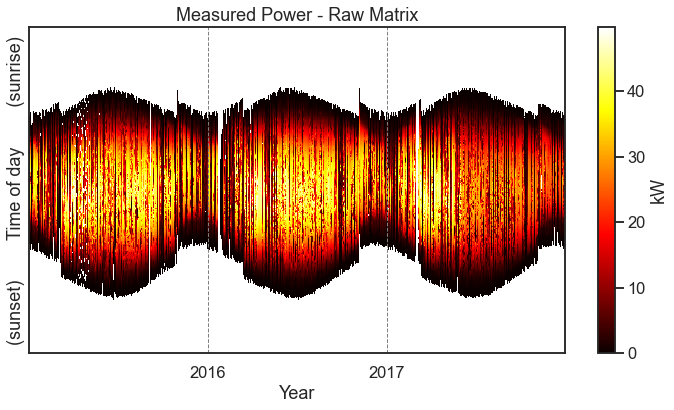

In [46]:
fig = dh.plot_heatmap(matrix='raw')
plt.title('Measured Power - Raw Matrix');

The "filled" matrix is a formal matrix $M\in\mathbf{R}^{m\times n}$. All entries are real-valued. Night time values and missing days are filled with zeros. Gap within days are filled with linear interpolation.

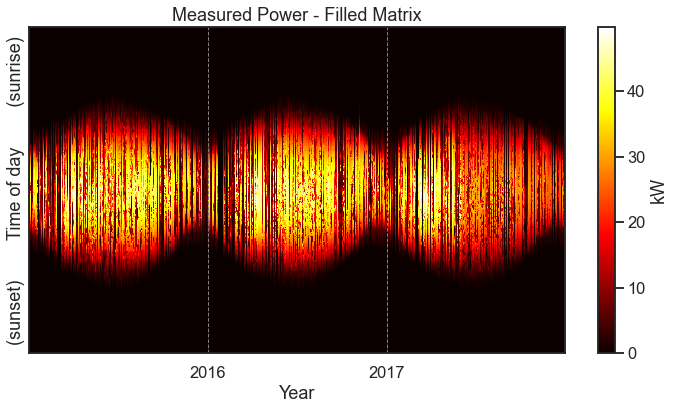

In [47]:
fig = dh.plot_heatmap(matrix='filled', scale_to_kw=True)
plt.title('Measured Power - Filled Matrix');

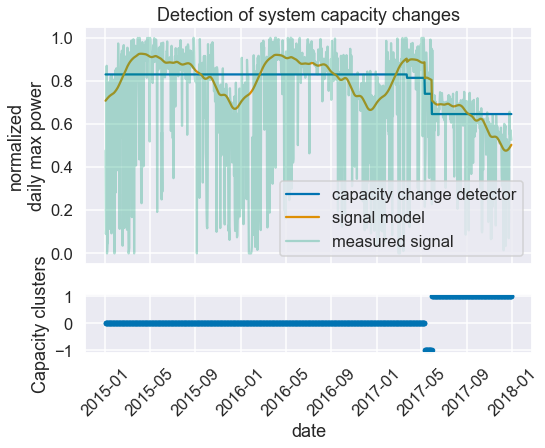

In [53]:
fig = dh.plot_capacity_change_analysis()
ax = fig.axes
ax[0].set_ylabel('normalized\ndaily max power')
ax[1].tick_params(axis='x', labelrotation=45);

In [10]:
sns.set_context('talk')

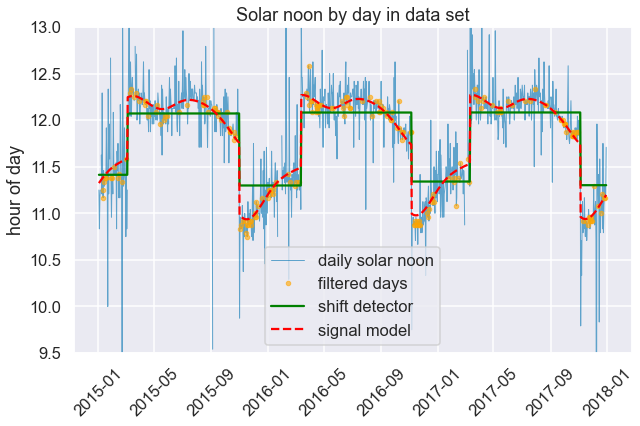

In [11]:
fig = dh.plot_time_shift_analysis_results(figsize=(10,6))
plt.ylim(9.5, 13)
plt.ylabel('hour of day')
plt.title('Solar noon by day in data set')
plt.legend(loc=8)
plt.xticks(rotation=45);

### Access to data

Data is available in a number of formats. The first is the original tabular data used at class instantiation.

In [12]:
type(dh.data_frame)

pandas.core.frame.DataFrame

In [13]:
dh.data_frame.columns

Index(['SiteID', 'ac_power', 'dc_power', 'inv1_ac_power', 'inv1_dc_current',
       'inv1_dc_power', 'inv1_dc_voltage', 'inv1_temp', 'inv2_ac_power',
       'inv2_dc_current', 'inv2_dc_power', 'inv2_dc_voltage', 'inv2_temp',
       'inv3_ac_power', 'inv3_dc_current', 'inv3_dc_power', 'inv3_dc_voltage',
       'inv3_temp', 'inv4_ac_power', 'inv4_dc_current', 'inv4_dc_power',
       'inv4_dc_temp', 'inv4_dc_voltage', 'inv5_ac_power', 'inv5_dc_current',
       'inv5_dc_power', 'inv5_dc_voltage', 'inv5_temp', 'inv6_ac_power',
       'inv6_dc_current', 'inv6_dc_power', 'inv6_dc_voltage', 'inv6_temp',
       'inv7_ac_power', 'inv7_dc_current', 'inv7_dc_power', 'inv7_dc_voltage',
       'inv7_temp'],
      dtype='object')

In [14]:
dh.data_frame['ac_power'].max()

49784.696427999996

In [15]:
dh.data_frame['ac_power'].min()

0.0

The second is the "raw" data matrix. This is a 2D `numpy.array` object created from the tabular data. Some entries may be missing if there was not a measurement reported for that timestamp in the data table.

In [16]:
dh.raw_data_matrix.shape

(288, 1094)

In [17]:
np.max(dh.raw_data_matrix)

nan

In [18]:
np.min(dh.raw_data_matrix)

nan

Finally, we have the "filled" data matrix. This 2D `numpy.array` has a real float value in every entry.

In [19]:
dh.filled_data_matrix.shape

(288, 1094)

In [20]:
np.max(dh.filled_data_matrix)

49784.696427999996

In [21]:
np.min(dh.filled_data_matrix)

0.0

### Daywise filtering and selection

After running the pipeline, the class has an attribute which holds a number of boolian indices, each of a length equal to the number of days in the data set. The available flags to filter on are shown below.

In [22]:
dh.daily_flags.__dict__.keys()

dict_keys(['density', 'linearity', 'no_errors', 'clear', 'cloudy', 'inverter_clipped', 'capacity_cluster'])

In [23]:
dh.daily_flags.no_errors

array([ True,  True,  True, ...,  True,  True,  True])

### Seasonal analysis using circular statistics

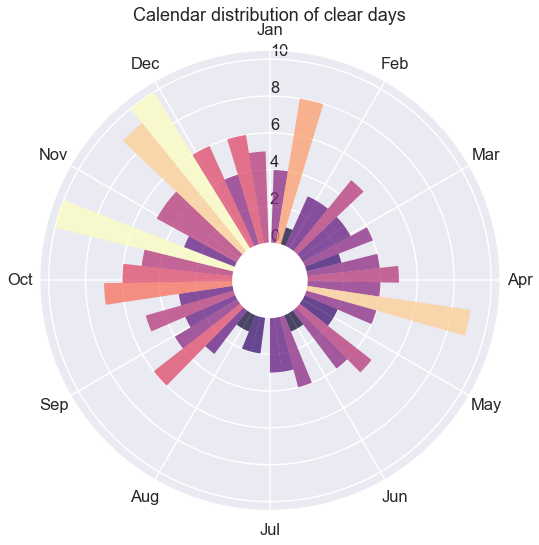

In [24]:
dh.plot_circ_dist(flag='clear');

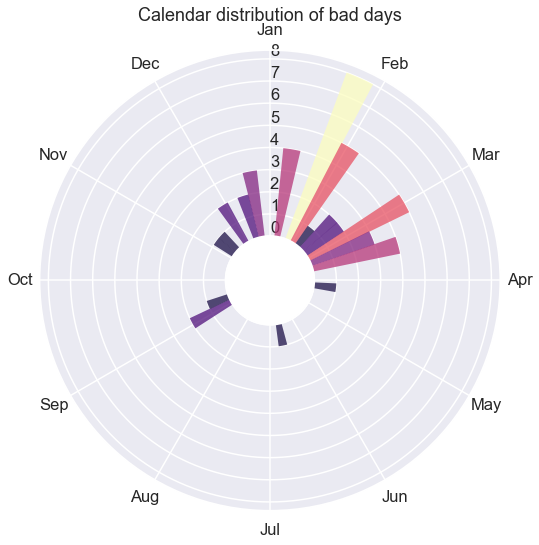

In [25]:
dh.plot_circ_dist(flag='bad');

### Views into the behavior of the algorithms

_Data quality flagging_

#### Clear Days

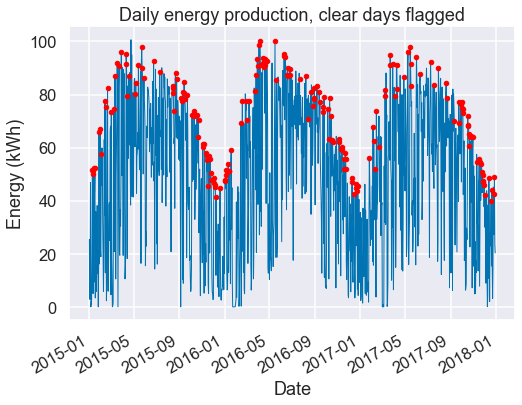

In [26]:
dh.plot_daily_energy(flag='clear');

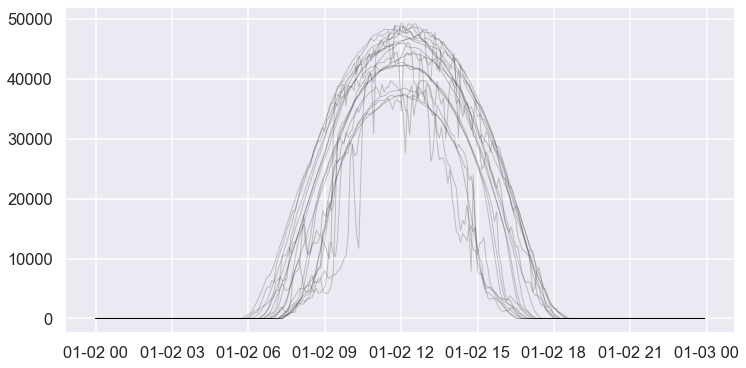

In [27]:
bix = dh.daily_flags.clear
dh.plot_daily_signals(boolean_index=bix, start_day=0, num_days=20, ravel=False, color='black', alpha=0.2);

#### Missing/corrupted data

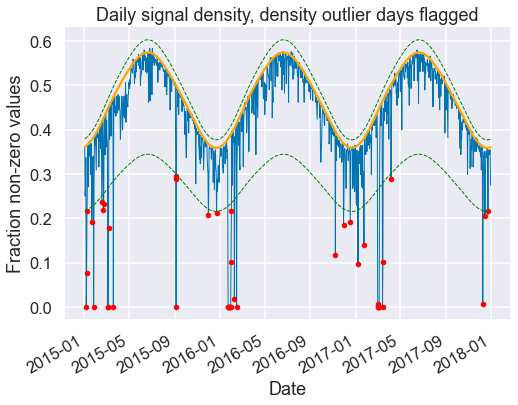

In [28]:
dh.plot_density_signal(show_fit=True, flag='density');

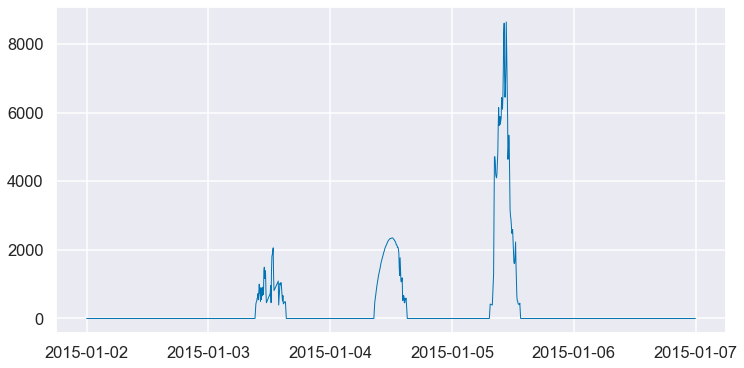

In [29]:
# Select days that failed the density test
bix = ~dh.daily_flags.density
dh.plot_daily_signals(boolean_index=bix, start_day=0, num_days=5, ravel=True);

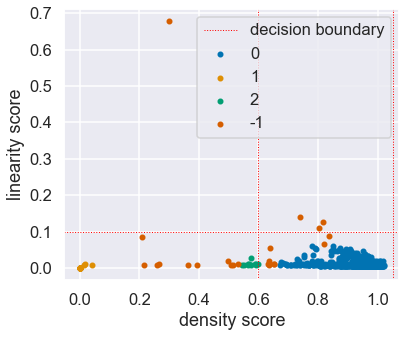

In [30]:
dh.plot_data_quality_scatter();

### Capacity change analysis

This analysis checks for abrupt step changes in the apparent capacity of the system.

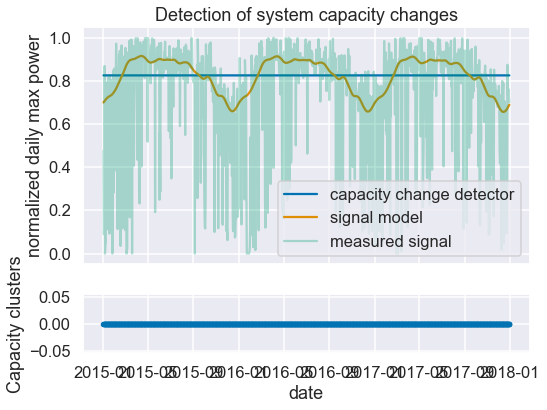

In [31]:
dh.plot_capacity_change_analysis();

### Clipping analysis

These plots show how clipped days are detected (none in this data set).

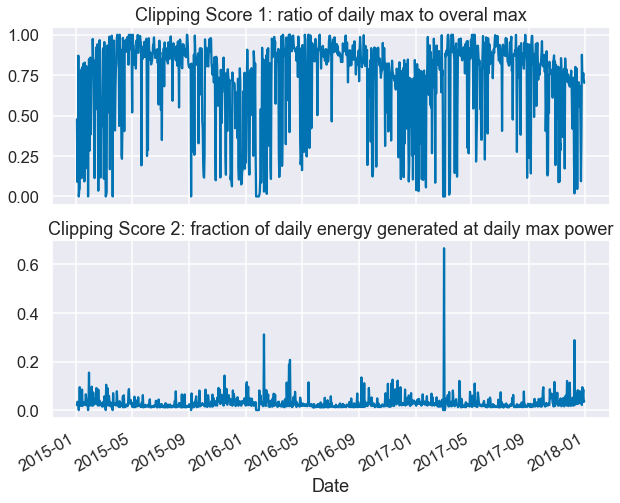

In [32]:
dh.plot_clipping();

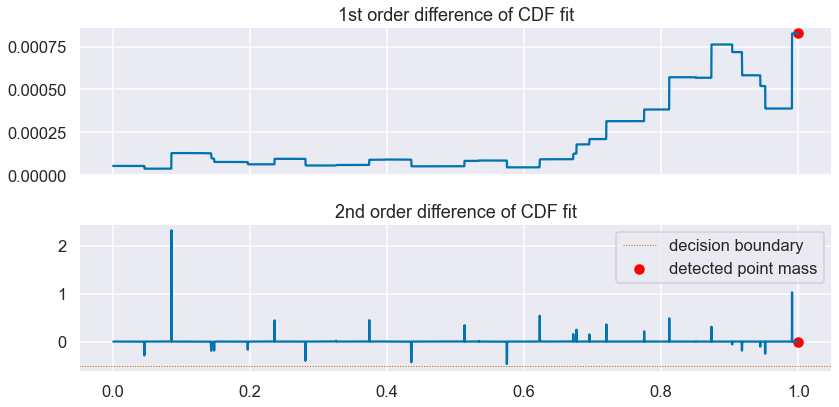

In [33]:
dh.plot_cdf_analysis();

In [34]:
dh.fit_statistical_clear_sky_model()

----------------------
SCSF Problem Setup
----------------------
Matrix Size: 288 x 1094 = 315072 power measurements
Sparsity: 91.40%
27084 non-zero measurements under clear conditions
Model size: 288 x 6 + 6 x 1094 = 1394 parameters


----------------------
Algorithm Iterations
----------------------
Starting at Objective: 9.621e+09, f1: 1.626e+07, f2: 1.661e+02, f3: 7.762e+09, f4: 1.843e+09
    Minimizing left matrix
    Minimizing right matrix
1 - Objective: 1.420e+07, f1: 1.241e+07, f2: 5.658e+02, f3: 1.789e+06, f4: 4.934e-05
    Minimizing left matrix
    Minimizing right matrix
2 - Objective: 1.221e+07, f1: 1.046e+07, f2: 1.625e+03, f3: 1.753e+06, f4: 1.001e-05
    Minimizing left matrix
    Minimizing right matrix
3 - Objective: 1.195e+07, f1: 1.023e+07, f2: 1.217e+03, f3: 1.721e+06, f4: 5.554e-06
    Minimizing left matrix
    Minimizing right matrix
4 - Objective: 1.186e+07, f1: 1.016e+07, f2: 1.173e+03, f3: 1.699e+06, f4: 5.971e-06
    Minimizing left matrix
    Minimizing ri

In [35]:
dh.scsf.degradation_rate()

array(-0.00990027)

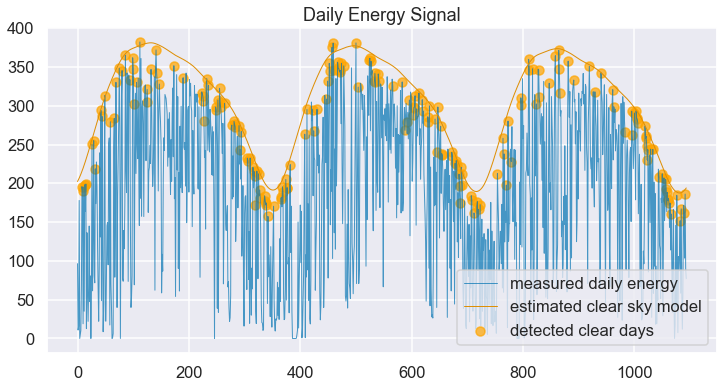

In [36]:
dh.scsf.plot_energy(show_clear=True, scale_power=True);

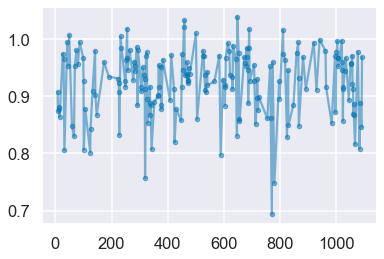

In [37]:
pi = np.sum(dh.filled_data_matrix, axis=0) / np.sum(dh.scsf.clear_sky_signals(), axis=0)
bix = dh.daily_flags.clear
xs = np.arange(len(pi))
# plt.plot(xs, pi)
plt.plot(xs[bix], pi[bix], marker='.', alpha=0.5);

In [38]:
from solardatatools.soiling import soiling_seperation_algorithm

In [39]:
s1, s2, s3 = soiling_seperation_algorithm(pi, index_set=bix, iterations=1)

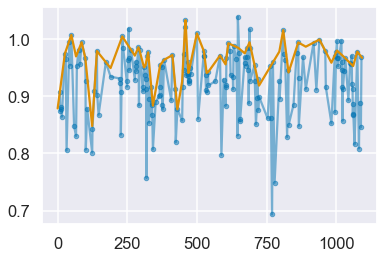

In [40]:
# plt.plot(xs, pi)
plt.plot(xs[bix], pi[bix], marker='.', alpha=0.5);
plt.plot(s1)

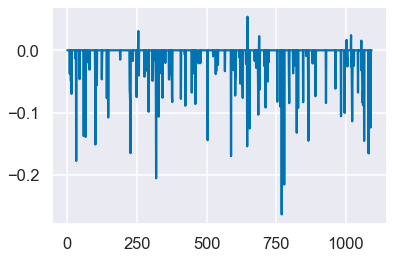

In [41]:
plt.plot(s3)